# <center><font color='red'>CLASSIFIERS</font></center>

### <center><font color='orange'>AUTHOR: Diogo Vieira</font></center>

-------------------------------------------

### <center><font color='grey'>Imports</font></center>

#### <center><font color='grey'>Libraries</font></center>

In [1]:
# Math, image processing and other useful libraries
from __future__ import print_function, unicode_literals, absolute_import, division
import os

import pandas as pd
import numpy as np

import pickle


from framework.Importing import *
from framework.Processing import *


print('📚 All libraries successfully imported 📚')

📚 All libraries successfully imported 📚


---

#### <center><font color='grey'>Directories</font></center>

In [2]:
### DATASET #1 (2D)
folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 1-a-tubulin_Sofia"
options   = ["CYTO","NUCL"]
denominator = label_tubulin

### DATASET #2 (3D)
# folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 3D"
# options     = ["CYTO3D","NUCL3D"]
# denominator = label_tubulin3D

### DATASET #3 (Soraia)
# folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\Soraia"
# options     = ["CYTO","NUCL"]
# denominator = label_soraia

### DATASET #4 (Inês)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Ines"
#options     = []
# denominator  =

### DATASET #4 (SPOCC)
# folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\SPOCC2022"
# options     = ["CYTO"]
# denominator = label_SPOCC

data = init_import(folder,options,denominator)
data['NUCL_PRE'] = pd.read_pickle(folder + "\\NUCL_PRE\\NUCL_PRE.pkl") # pd.read_pickle(os.getcwd() + "\\NUCL_PRE_2D_StarDist.pkl") #
data['CYTO_PRE'] = pd.read_pickle(folder + "\\CYTO_PRE\\CYTO_PRE.pkl") 

ResultsDF = pd.read_pickle(folder + "\\ResultsDF_28_nov_23.pkl")


>>> [CYTO] added.
>>> [NUCL] added.


In [3]:
ResultsDF

,Name,Img Index,Label,Mask,Patches,Lines,Graph,LSF2D:Angles,LSF2D:Distances to Centroid,LSF2D:Triangle Areas,...,LSF1D:N over A (LinReg),DNF:Area (scaled),DCF:AreaRatio 5,LSF:Radial Pos 2,LSF:Radial Score 2,LSF1D:RS NucCent Distance (LinReg) (scaled),LSF2D:Distances to Centroid (LinReg) (scaled),LSF2D:Alphas (LinReg),LSF1D:Circular Variance (LinReg),DCF:AreaRatio 6
0,MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,38,No transfection,"[[False, False, False, False, False, False, Fa...","[[[False, False, False, False, False, False, F...","[((846.96, 125.385), (843.154, 135.458)), ((90...","[ (1, 2)\t1.0\n (2, 1)\t1.0\n (2, 4)\t1.0\n...","[24.256, 56.447, 77.093, 39.697, 65.666, 64.38...","[61.939, 143.836, 28.124, 126.194, 41.283, 66....","[137.0, 408.228, 53.471, 183.353, 64.306, 232....",...,0.986627,52.159134,0.553179,"[310, 895]",0.526,20.409598,"[29.481, 29.42, 29.09, 28.858, 28.402, 28.362,...","[40.022, 14.661, 86.865, 3.481, 41.181, 41.948...",0.792584,0.404844
1,MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,38,No transfection,"[[False, False, False, False, False, False, Fa...","[[[False, False, False, False, False, False, F...","[((1226.05, 591.863), (1229.906, 588.782)), ((...","[ (1, 2)\t1.0\n (2, 1)\t1.0\n (2, 4)\t1.414...","[11.074, 26.265, 40.852, 6.218, 77.168, 26.269...","[95.139, 23.384, 90.483, 73.611, 26.804, 96.53...","[45.096, 18.922, 177.546, 15.493, 70.073, 129....",...,1.271279,124.027453,0.758949,"[620, 1075]",0.524,11.265213,"[11.72, 11.977, 11.728, 10.36, 10.56, 11.59, 9...","[82.09, 20.085, 35.896, 25.192, 9.078, 72.63, ...",0.835076,0.769107
2,MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,38,No transfection,"[[False, False, False, False, False, False, Fa...","[[[False, False, False, False, False, False, F...","[((826.21, 118.655), (825.066, 124.886)), ((82...","[ (1, 2)\t1.0\n (2, 1)\t1.0\n (2, 3)\t1.414...","[28.672, 55.951, 31.395, 27.53, 25.057, 22.241...","[74.211, 25.097, 67.937, 28.992, 35.359, 27.39...","[112.783, 64.456, 149.307, 34.752, 69.741, 65....",...,1.078691,52.159134,0.572535,"[290, 890]",0.523,17.117854,"[28.406, 28.105, 27.238, 28.024, 24.14, 22.804...","[21.132, 61.285, 36.563, 42.571, 12.072, 5.516...",0.779563,0.408720
3,MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,38,No transfection,"[[False, False, False, False, False, False, Fa...","[[[False, True, False, False, False, False, Fa...","[((881.97, 87.737), (872.975, 72.653)), ((879....","[ (1, 2)\t1.0\n (2, 1)\t1.0\n (2, 3)\t1.414...","[20.094, 57.405, 61.997, 11.955, 15.799, 30.33...","[83.948, 26.429, 102.525, 141.98, 98.202, 133....","[253.26, 118.564, 241.509, 224.165, 172.172, 6...",...,0.851541,59.075550,0.521786,"[305, 925]",0.393,23.393638,"[20.947, 19.481, 19.647, 19.194, 18.717, 18.40...","[25.933, 3.512, 50.289, 17.071, 49.76, 26.445,...",0.753377,0.412491
4,MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,38,No transfection,"[[False, False, False, False, False, False, Fa...","[[[False, True, True, False, False, False, Fal...","[((919.221, 167.758), (920.078, 160.075)), ((9...","[ (1, 2)\t1.0\n (1, 3)\t1.4142135623730951\n...","[48.07, 4.47, 65.924, 53.998, 33.861, 23.61, 5...","[32.138, 49.333, 81.292, 30.35, 80.794, 123.43...","[92.418, 7.798, 208.683, 138.812, 203.711, 222...",...,0.638174,82.866980,0.683784,"[315, 985]",0.394,21.406471,"[16.239, 15.695, 13.934, 14.106, 13.872, 12.37...","[13.76, 81.803, 11.636, 78.75, 12.824, 48.188,...",0.800374,0.549199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,MAX_40_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,40,Del38_46,"[[False, False, False, False, False, False, Fa...","[[[True, False, False, False, False, False, Fa...","[((1302.876, 636.71), (1315.898, 650.104)), ((...","[ (1, 2)\t1.0\n (2, 1)\t1.0\n (2, 3)\t1.414...","[6.437, 51.558, 70.196, 2.449, 35.981, 45.614,...","[24.55, 54.236, 11.064, 16.849, 37.888, 7.025,...","[25.706, 253.343, 45.029, 1.354, 60.215, 14.18...",...,0.417319,60.817655,0.604705,"[555, 1245]",0.382,14.642922,"[14.531, 9.818, 9.37, 6.89, 7.879, 

### Unfold dataset

In [3]:
sep = create_separate_DFs(ResultsDF,options=["FULL"])
FULL = sep["FULL"]
FULL

,Name,Img Index,Label,Mask,Patches,DCF:AAI,DCF:Fractal Dim B,DCF:Fractal Dim D,DCF:Area,DCF:BB Area,...,OTHERS:Cytoskeleton-Nuclei Centroid Distance,OTHERS:Weighted Cytoskeleton-Nuclei Centroid Distance,OTHERS:Area Ratio (Cyto vs. Nucl),OTHERS:Main Vector Magnitude,OTHERS:AreaRatio3,OTHERS:AreaRatio4,OTHERS:IntCluMet Maximum Distance,OTHERS:IntCluMet Mean Distance,OTHERS:IntCluMet Distance to CoM,OTHERS:IntCluMet Distance to CoM (divided by Nlines)
0,MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,38,No transfection,"[[False, False, False, False, False, False, Fa...","[[[False, False, False, False, False, False, F...",37.931631,1.102,-0.702,10873,47886,...,49.774633,26.837390,0.551899,1440.873319,0.252828,1.211504,53.300199,14.707225,20.890816,0.09948
1,MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,38,No transfection,"[[False, False, False, False, False, False, Fa...","[[[False, False, False, False, False, False, F...",45.605331,1.211,-0.703,11324,26070,...,12.957109,22.330308,0.560575,1762.518556,0.509449,1.024347,36.802624,12.170453,18.206199,0.070294
2,MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,38,No transfection,"[[False, False, False, False, False, False, Fa...","[[[False, False, False, False, False, False, F...",37.753234,1.156,-0.628,10809,45968,...,45.713312,22.855052,0.504579,1411.933387,0.257933,1.111451,51.832018,14.358665,20.464422,0.104946
3,MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,38,No transfection,"[[False, False, False, False, False, False, Fa...","[[[False, True, False, False, False, False, Fa...",49.827183,1.167,-0.682,9166,25056,...,31.785819,11.760368,0.689381,1623.039870,0.346825,1.147967,45.525702,15.149756,23.009256,0.117394
4,MAX_38_IF6_CHO_L-W5_Z_decon_ch02_PS.tif,38,No transfection,"[[False, False, False, False, False, False, Fa...","[[[False, True, True, False, False, False, Fal...",44.742942,1.209,-0.650,11128,27560,...,13.882796,17.669537,0.838962,1619.936778,0.384795,1.609685,38.437552,12.203071,18.271652,0.079098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,MAX_40_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,40,Del38_46,"[[False, False, False, False, False, False, Fa...","[[[True, False, False, False, False, False, Fa...",39.447532,1.136,-0.610,10951,23635,...,9.726985,9.604814,0.639109,1041.488542,0.384257,1.238769,25.448842,8.187780,11.786753,0.072758
1042,MAX_40_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,40,Del38_46,"[[False, False, False, False, False, False, Fa...","[[[False, False, False, False, False, False, F...",46.875071,1.104,-0.674,9067,16236,...,3.374775,22.372585,0.998898,1065.467097,0.400353,1.745955,28.957392,8.931360,12.844157,0.077374
1043,MAX_40_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,40,Del38_46,"[[False, False, False, False, False, False, Fa...","[[[False, False, False, False, False, False, F...",43.826114,1.096,-0.770,7429,10541,...,2.047217,6.801005,0.964766,690.681055,0.422399,2.259528,18.691372,6.337721,9.345303,0.074762
1044,MAX_40_IF6_CHO_L-W6_Z_decon_ch02_PS.tif,40,Del38_46,"[[False, False, False, False, False, False, Fa...","[[[False, True, False, False, False, False, Fa...",40.970373,1.144,-0.723,8173,17548,...,1.912660,16.950257,0.991805,770.446628,0.319711,2.262556,23.997336,7.466824,10.814320,0.098312


### Isolate X, y

In [26]:
# OPTION 1 - FULL DATASET, ALL CLASSES
# X = FULL[FULL.columns[5:]]
# labels = FULL['Label']
# label_to_integer = {'WT': 0, 'Del38_46': 1, 'Dup41_46': 2, 'Mock': 3, 'Mut394': 4, 'No transfection': 5}

# OPTION 2 - FULL DATASET, 2 CLASSES
# t = FULL.drop(FULL[FULL['Label'].isin(['Dup41_46', 'Mock','Mut394','No transfection'])].index)
# labels = t['Label']
# X = t[t.columns[5:]]
# label_to_integer = {'WT': 0, 'Del38_46': 1}
# y = [label_to_integer[label] for label in labels]

# OPTION 3 - REDUCED DATASET, 2 CLASSES
# t = FULL.drop(FULL[FULL['Label'].isin(['Dup41_46', 'Mock','Mut394','No transfection'])].index)
# labels = t['Label']
# X = t[t.columns[5:]]
# X = X[['SKNW:branch-distance (scaled) mean',
#        'LSF1D:N over A (LinReg)',
#        'DCF:AreaRatio 6',
#        'LSF1D:OOP (LinReg)',
#        'SKNW:Number of Branches',
#        'LSF1D:RS',
#        'DCF:AAI',
#        'DNF:Roundness']]
# label_to_integer = {'WT': 0, 'Del38_46': 1}
# y = [label_to_integer[label] for label in labels]

# OPTION 3 - REDUCED DATASET, 2 CLASSES
t = FULL.drop(FULL[FULL['Label'].isin(['Mock','No transfection'])].index)
labels = t['Label']
X = t[t.columns[5:]]
X = X[['LSF1D:OOP (LinReg)',
       'LSF1D:Circular Variance (LinReg)',
       
       'DCF:CV',
       'DCF:Skewness',
    
       'LSF1D:Angle Difference cv',
       'LSF1D:Std. Angle Difference cv',
       
       'SKNW:branch-distance (scaled) mean',
       'SKNW:branch-distance sigma_mu',
       
       'LSF1D:N over A (LinReg)',
       
       
       'SKNW:Ratio of Endpoint-to-endpoint (isolated branch)',
       'SKNW:Ratio of Junction-to-endpoints',
       
       'DCF:AAI',
       'SKNW:Number of Branches',
       
       'LSF1D:RS NucCent Distance (LinReg) (scaled)',
       'LSF1D:RS',
       
       'DCF:AreaRatio 6',
       'OTHERS:Weighted Cytoskeleton-Nuclei Centroid Distance',
       
       'DNF:Area',
       'DNF:Roughness',
       'DNF:Circularity',
       'DNF:Std']]
label_to_integer = {'WT': 0, 'Dup41_46':0, 'Del38_46': 1,'Mut394': 1}
y = [label_to_integer[label] for label in labels]

In [ ]:
# ORIENTATION: OOP, CVar
# BUNDLING: 
# PARALLELISM: AngDiff
# MORPHOLOGY: Mean Br distance
# COMPACTNESS
# CONNECTIVITY
# QUANTITY
# RADIALITY: RS NucCent D
# CYTO-NUC
# DNF

In [59]:
# for col in X.columns:
#     if type(X.loc[0][col]) != np.float64 and type(X.loc[0][col]) != int:
#         print(col,type(X.loc[0][col]))
        
        
X = X.drop('DCF:Nucleus Centroid 2', axis=1)
X = X.drop('LSF1D:RSpos', axis=1)
X = X.drop('SKNW:branch-distance (scaled)', axis=1)
X = X.drop('SKNW:Tortuosity (biggerthanbr2)', axis=1)
f = X.columns

KeyError: "['DCF:Nucleus Centroid 2'] not found in axis"

## Decision Tree

In [21]:
from sklearn import tree

# HYPER PARAMETERS:
criterion = 'gini' #or 'entropy'
min_samples_split=5
#min_samples_leaf =
#max_depth = 

dtc = tree.DecisionTreeClassifier(criterion         = criterior, 
                                  min_samples_split = min_samples_split)
dtc = dtc.fit(X,y)

out = tree.export_graphviz(dtc, out_file='tree_gini.gvz', feature_names=X.columns)

## Logistic Regression

## CROSS-VALIDATION FOLDS

In [36]:
help(KFold)

Help on class KFold in module sklearn.model_selection._split:

class KFold(_BaseKFold)
 |  KFold(n_splits=5, *, shuffle=False, random_state=None)
 |  
 |  K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used once as a validation while the k - 1 remaining
 |  folds form the training set.
 |  
 |  Read more in the :ref:`User Guide <k_fold>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=5
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.22
 |          ``n_splits`` default value changed from 3 to 5.
 |  
 |  shuffle : bool, default=False
 |      Whether to shuffle the data before splitting into batches.
 |      Note that the samples within each split will not be shuffled.
 |  
 |  random_state : int, RandomState instance or None, default=None
 |      When `shuffle` is True, `random_state` affect

In [16]:
from sklearn.model_selection import train_test_split,KFold

n_splits = 2

CV = KFold(n_splits = 2,shuffle=True)

for train_index, test_index in CV.split(X):
    X_train = np.array(X)[train_index]
    y_train = np.array(y)[train_index]
    X_test = np.array(X)[test_index]
    y_test = np.array(y)[test_index]


In [ ]:
from sklearn.model_selection import train_test_split,KFold

n_splits = 2

CV = KFold(n_splits = 2,shuffle=True)

for train_index, test_index in CV.split(X):
    X_train = np.array(X)[train_index]
    y_train = np.array(y)[train_index]
    X_test = np.array(X)[test_index]
    y_test = np.array(y)[test_index]


# MAIN CODE

In [37]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

X = np.array(X)
y = np.array(y)

# Define the outer and inner cross-validation folds
outer_cv = KFold(n_splits=len(X), shuffle=True, random_state=42) #LeaveOneOut()
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42) #LeaveOneOut()

# Outer cross-validation loop
outer_scores = []
i = 0
for train_index, test_index in outer_cv.split(X):
    print('Outer fold: ' + str(i))
    X_train_outer, X_test_outer = X[train_index], X[test_index]
    y_train_outer, y_test_outer = y[train_index], y[test_index]

    # Inner cross-validation loop for hyperparameter tuning
    # RANDOM FOREST
#     param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
#     pipeline = RandomForestClassifier()

    # K NEAREST NEIGHBOUR
#     param_grid = {'kneighborsclassifier__n_neighbors': [2,3,4,5,6,7,8]}
#     pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

    # NAIVE BAYES
#     param_grid = {'gaussiannb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
#     pipeline = make_pipeline(StandardScaler(), GaussianNB())

    # SUPPORT VECTOR MACHINE
    param_grid = {'svc__C': [1, 5, 10, 15], 'svc__kernel': ['linear', 'rbf','poly','sigmoid'], 'svc__degree': [3,4,5], 'svc__gamma': ['scale', 'auto']}
    pipeline = make_pipeline(StandardScaler(), SVC())

    # ANN
    # param_grid = {
    #     'mlpclassifier__hidden_layer_sizes': [(20,),(20,20,20),(50,), (100,), (50, 50), (100, 50)],
    #     'mlpclassifier__activation': ['relu', 'tanh'],
    #     'mlpclassifier__alpha': [0.0001, 0.001, 0.01]}
    # pipeline = make_pipeline(StandardScaler(), MLPClassifier(max_iter=500, random_state=42))

    
    # Hyper Parameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring='accuracy',refit=True,verbose=True)
    grid_search.fit(X_train_outer, y_train_outer)
    print('Parameters tuned for Fold ' + str(i))
    
    # Get the best model from hyperparameter tuning
    best_pipeline = grid_search.best_estimator_
    print(best_pipeline,grid_search.best_params_)

    # Evaluate the best model on the outer test set
    y_pred_outer = best_pipeline.predict(X_test_outer)
    outer_accuracy = accuracy_score(y_test_outer, y_pred_outer)
    outer_scores.append(outer_accuracy)
    i += 1

# Report the final performance
mean_outer_accuracy = sum(outer_scores) / len(outer_scores)
print(f'Mean outer accuracy: {mean_outer_accuracy}')


Outer fold: 0
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 0
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 1
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 1
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 2
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 2
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=10))]) {'svc__C': 10, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 3
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 3
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 

Parameters tuned for Fold 32
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 33
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 33
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 34
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 34
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 35
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 35
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 36
Fitting 5 folds for each of 96 can

Parameters tuned for Fold 64
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 65
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 65
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 66
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 66
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 67
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 67
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=10))]) {'svc__C': 10, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 68
Fitting 5 folds for each of 96 c

Parameters tuned for Fold 96
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 97
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 97
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 98
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 98
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 99
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 99
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 100
Fitting 5 folds for each of 96 ca

Parameters tuned for Fold 128
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 129
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 129
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 130
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 130
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 131
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Parameters tuned for Fold 131
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=5))]) {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Outer fold: 132
Fitting 5 folds for each o

KeyboardInterrupt: 

# PCA

In [27]:
def remove_redundant(DF, corr_thr):
    from scipy.stats import pearsonr
    redExtractedFeat     = [x for x in DF.columns if x.startswith("LSF1D") or x.startswith("DCF") or x.startswith("DNF") or x.startswith("SKNW") or x.startswith("OTHERS")]
    #redExtractedFeat = DF.columns
    trmv = []
    red_feature_vector = copy.deepcopy(DF).to_numpy()
    #red_feature_vector = red_feature_vector.iloc[: , 8:].to_numpy()
    
    while 1:
        oldF = redExtractedFeat
        
        # combine current set of features, two at a time
        comb = combinations(range(len(oldF)), 2) 
        
        for f in list(comb):
            # find correlation between the two features in analysis
            corr = pearsonr(red_feature_vector[:, f[0]], red_feature_vector[:, f[1]])[0]
            
            if corr > corr_thr:
                #print("Highly Corr: ", oldF[f[0]], oldF[f[1]], corr)
                trmv += [redExtractedFeat[f[0]]]
                redExtractedFeat = np.delete(oldF, f[0])
                red_feature_vector = np.delete(red_feature_vector, f[0], axis=1)
                break
                
        if len(redExtractedFeat) == len(oldF):
            break
    
    return red_feature_vector,redExtractedFeat 

In [30]:
# PCA
# ESCOLHER: LSF,DCF,DNF or FULL
DF = X
thr = 0.8

print('Initial Number of Features: ' + str(len(DF.columns)))

# Removal of redundant features - one of the features of pairs with Pearson correlation >thr
global redFeatLabels
redFeatMatrix,redFeatLabels = remove_redundant(DF,thr) 
print('Initial Number of Features: ' + str(len(redFeatLabels)))

Initial Number of Features: 21
Initial Number of Features: 18


In [90]:
# Perform redudant feature analysis
thr_redundant_analysis((0.5,1,0.05),DF)
#plt.savefig(".//ResultsGenAnalysis//Hough26Mar//PCA - DNF//thr_analysis.png",format='png',transparent=True,bbox_inches='tight')

NameError: name 'thr_redundant_analysis' is not defined

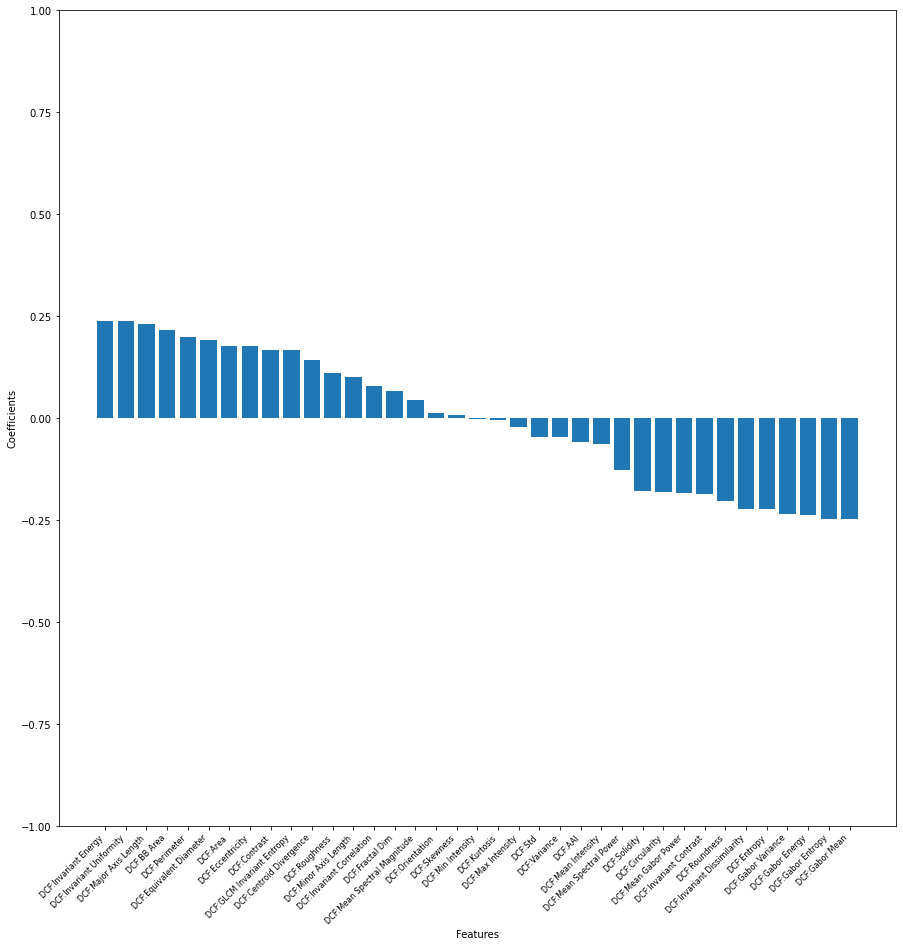

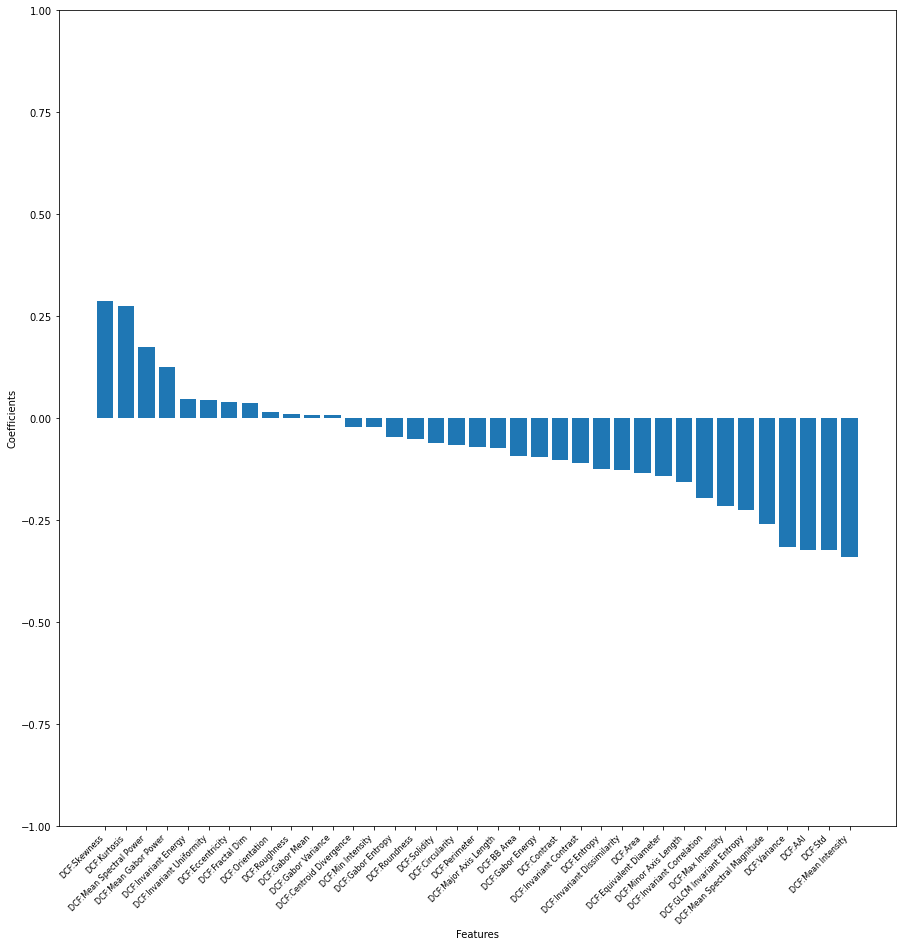

In [10]:
# Plot PC0 and PC1 coefficients
plot_pca_coefficients(redFeatLabels,redFeatMatrix)

working...


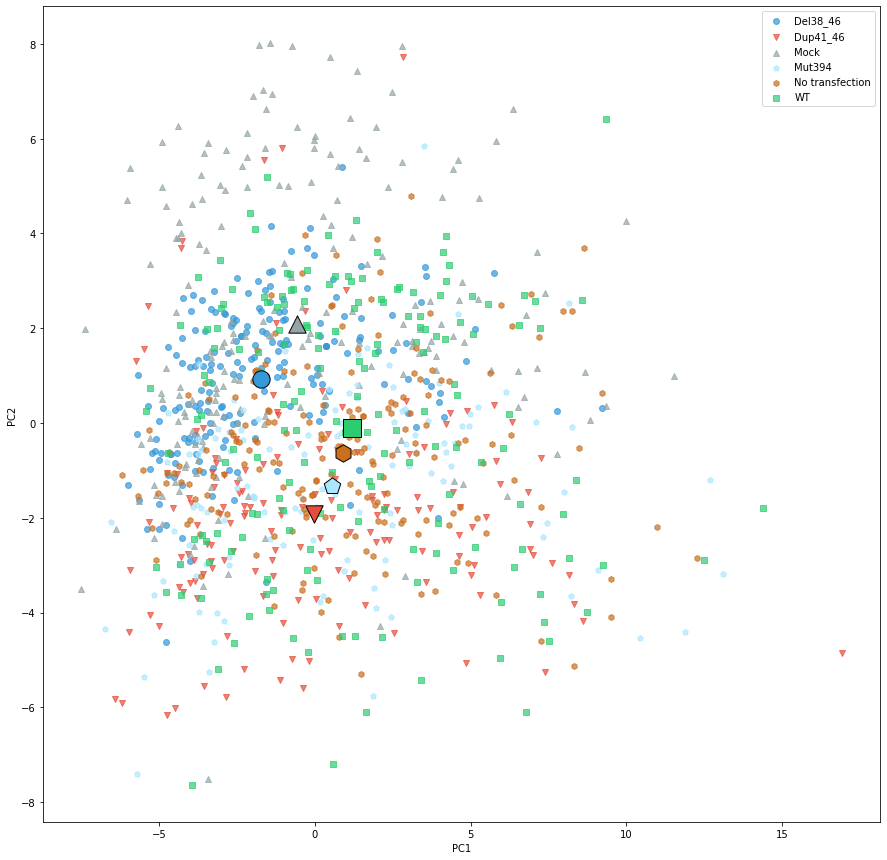

Final Number of Features: 37
Variances from PC0, PC1 and PC2: [0.3882832  0.18723321 0.098753  ]
Total Variance Explained (2D) = 0.5755164090046454
Total Variance Explained (3D) = 0.6742694100321087


In [11]:
plot_PCA(redFeatMatrix,redFeatLabels,ResultsDF)

In [66]:
for i in range(len(FULL.columns)):
    print(str(FULL.columns[i]) + str(" = ") + str(len(np.unique(FULL[FULL.columns[i]].isnull()))))

Angles mean = 1
Angles median = 1
Angles min = 1
Angles max = 1
Angles max_amp = 1
Angles var = 1
Angles std_dev = 1
Angles abs_dev = 1
Angles kurtosis = 1
Angles skewness = 1
Distances to Centroid mean = 1
Distances to Centroid median = 1
Distances to Centroid min = 1
Distances to Centroid max = 1
Distances to Centroid max_amp = 1
Distances to Centroid var = 1
Distances to Centroid std_dev = 1
Distances to Centroid abs_dev = 1
Distances to Centroid kurtosis = 1
Distances to Centroid skewness = 1
Triangle Areas mean = 1
Triangle Areas median = 1
Triangle Areas min = 1
Triangle Areas max = 1
Triangle Areas max_amp = 1
Triangle Areas var = 1
Triangle Areas std_dev = 1
Triangle Areas abs_dev = 1
Triangle Areas kurtosis = 1
Triangle Areas skewness = 1
Line Lengths mean = 1
Line Lengths median = 1
Line Lengths min = 1
Line Lengths max = 1
Line Lengths max_amp = 1
Line Lengths var = 1
Line Lengths std_dev = 1
Line Lengths abs_dev = 1
Line Lengths kurtosis = 1
Line Lengths skewness = 1
Theta 

In [ ]:
kmeans = KMeans(n_clusters=3, random_state = 42).fit(DCF)
result = kmeans.predict(df_img)

plt.imshow(result, cmap='twilight');

## Separate Analysis

In [21]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)
# Perform interactive PCA visualization
def plot_PCA_1(array,labels,ResultsDF,wid_list,data_type):
    # Get hover data type
    if data_type == 'LSF':
        type_ind = 0
    if data_type == 'DCF':
        type_ind = 1
    if data_type == 'DNF':
        type_ind = 2
    
    # Colors and Markers
    colors  = ["#3498DB","#E74C3C","#95A5A6","#ABE6FF","#CA6F1E","#2ECC71"]
    markers = ["o","v","^","p","h","s"]
    
    # STD normalization, PCA
    global feats_PCA
    redFeatMatrix               = StandardScaler().fit_transform(array)
    pca                         = PCA(n_components='mle', random_state=0, svd_solver = 'full')
    feats_PCA                   = pca.fit_transform(redFeatMatrix)

    # Labels
    global ls
    ls = np.unique(ResultsDF['Label'])
    print(ls)
    c = [colors[list(ls).index(x)] for x in ResultsDF['Label']]
    m = [markers[list(ls).index(y)] for y in ResultsDF['Label']]

    # Plot 2D
    fig, ax = plt.subplots(figsize=(15,15))
    #plt.figure(figsize=(15,15))
    clusterpoints = feats_PCA[:,0:2]

    for p in range(len(ls)):
        #global d,unique,u,points
        d = ResultsDF[ResultsDF['Label'] == ls[p]]
        points = clusterpoints[ResultsDF['Label'] == ls[p]]
        
        if wid_list[p] == True:
            # print(wid_list[p])
            sc = ax.scatter(points[:,0],points[:,1],c=colors[p],marker=markers[p],label=ls[p],zorder=4,alpha=0.7)
            
            unique = d.index
            
            #for poi in range(len(points[:,0])):
                
            #fig1, ax1 = plt.subplots(figsize=(5,5))
            #arr = np.arange(100).reshape((10, 10))

            global annot
            annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points", arrowprops=dict(arrowstyle="->"))
            #ax.add_artist(ab)
            annot.set_visible(False)

            def update_annot(ind):
                global pos
                pos = sc.get_offsets()[ind["ind"][0]]
                #pos = sc.get_offsets()[ind["ind"]]
                   
                im = OffsetImage(d.loc[[unique[n] for n in ind["ind"]][0]]['Patches'][type_ind], zoom=1,cmap='gray')
                #im = OffsetImage(d.loc[unique[ind["ind"]]]['Patches'][1], zoom=0.2)
                im.image.axes = ax
                #annot = AnnotationBbox(im, (points[:,0][ind["ind"][0]],points[:,1][ind["ind"][0]]), xybox=(-50., 50.), xycoords='data', boxcoords="offset points", pad=0.3, arrowprops=dict(arrowstyle="->"))
                
                annot = AnnotationBbox(im, (pos[0],pos[1]), xybox=(-50., 50.), xycoords='data', boxcoords="offset points", pad=0.3, arrowprops=dict(arrowstyle="->"))
                
                annot.xy = pos
                #annot1 = AnnotationBbox(im, (pos[0][1],pos[0][0]), xybox=(-50., 50.), xycoords='data', boxcoords="offset points", pad=0.3, arrowprops=dict(arrowstyle="->"))

                ax.add_artist(annot)

            def hover(event):
                vis = annot.get_visible()
                if event.inaxes == ax:
                    global ind
                    cont, ind = sc.contains(event)
                    if cont:
                        update_annot(ind)
                        annot.set_visible(True)
                        fig.canvas.draw_idle()
                    else:
                        if vis:
                            annot.set_visible(False)
                            fig.canvas.draw_idle()

            fig.canvas.mpl_connect("motion_notify_event", hover)

        else:
            ax.scatter(points[:,0],points[:,1],c='w',marker=markers[p],label=ls[p],zorder=1,alpha=0.7)
            #print(wid_list[p])

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend()

    # mid point
    for p in range(len(ls)):
        points = clusterpoints[ResultsDF['Label'] == ls[p]]
        if wid_list[p] == True:
            ax.scatter(np.mean(points,axis=0)[0],np.mean(points,axis=0)[1],c=colors[p],marker=markers[p],label=ls[p],s=300,edgecolors='k',zorder=5,alpha=0.5)
        else:
            ax.scatter(points[:,0],points[:,1],c='w',marker=markers[p],label=ls[p],zorder=1,alpha=0.5)

    plt.show()

---

In [24]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)
# Perform interactive PCA visualization
def plot_PCA_1(array,labels,ResultsDF,wid_list,data_type):
    # Get hover data type
    if data_type == 'LSF':
        type_ind = 0
    if data_type == 'DCF':
        type_ind = 1
    if data_type == 'DNF':
        type_ind = 2
    
    # Colors and Markers
    colors  = ["#3498DB","#E74C3C","#95A5A6","#ABE6FF","#CA6F1E","#2ECC71"]
    markers = ["o","v","^","p","h","s"]
    
    # STD normalization, PCA
    global feats_PCA
    redFeatMatrix               = StandardScaler().fit_transform(array)
    pca                         = PCA(n_components='mle', random_state=0, svd_solver = 'full')
    feats_PCA                   = pca.fit_transform(redFeatMatrix)

    # Labels
    global ls,c,m
    ls = np.unique(ResultsDF['Label'])
    print(ls)
    c = [colors[list(ls).index(x)] for x in ResultsDF['Label']]
    m = [markers[list(ls).index(y)] for y in ResultsDF['Label']]

    # Plot 2D
    fig, ax = plt.subplots(figsize=(15,15))
    clusterpoints = feats_PCA[:,0:2]

    for p in range(len(ls)):
        #global d,unique,u,points
        d = ResultsDF[ResultsDF['Label'] == ls[p]]
        points = clusterpoints[ResultsDF['Label'] == ls[p]]
        
        if wid_list[p] == True:
            # print(wid_list[p])
            ax.scatter(points[:,0],points[:,1],c=colors[p],marker=markers[p],label=ls[p],zorder=4,alpha=0.7,picker = True)
        else:
            ax.scatter(points[:,0],points[:,1],c='w',marker=markers[p],label=ls[p],zorder=1,alpha=0.7,picker = True)
            #print(wid_list[p])
    
    global sc, unique
    sc = plt.gca().collections[0]
    unique = ResultsDF.index
            
    #for poi in range(len(points[:,0])):

    #fig1, ax1 = plt.subplots(figsize=(5,5))
    #arr = np.arange(100).reshape((10, 10))

    global annot
    annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points", arrowprops=dict(arrowstyle="->"))
    #ax.add_artist(ab)
    annot.set_visible(False)

    def update_annot(ind):
        global pos
        pos = sc.get_offsets()[ind["ind"][0]]
        #pos = sc.get_offsets()[ind["ind"]]

        im = OffsetImage(ResultsDF.loc[[unique[n] for n in ind["ind"]][0]]['Patches'][type_ind], zoom=1,cmap='gray')
        #im = OffsetImage(d.loc[unique[ind["ind"]]]['Patches'][1], zoom=0.2)
        im.image.axes = ax
        #annot = AnnotationBbox(im, (points[:,0][ind["ind"][0]],points[:,1][ind["ind"][0]]), xybox=(-50., 50.), xycoords='data', boxcoords="offset points", pad=0.3, arrowprops=dict(arrowstyle="->"))

        annot = AnnotationBbox(im, (pos[0],pos[1]), xybox=(-50., 50.), xycoords='data', boxcoords="offset points", pad=0.3, arrowprops=dict(arrowstyle="->"))

        annot.xy = pos
        #annot1 = AnnotationBbox(im, (pos[0][1],pos[0][0]), xybox=(-50., 50.), xycoords='data', boxcoords="offset points", pad=0.3, arrowprops=dict(arrowstyle="->"))

        ax.add_artist(annot)

    def hover(event):
        vis = annot.get_visible()
        if event.inaxes == ax:
            global ind
            cont, ind = sc.contains(event)
            if cont:
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend()

    # mid point
    for p in range(len(ls)):
        points = clusterpoints[ResultsDF['Label'] == ls[p]]
        if wid_list[p] == True:
            ax.scatter(np.mean(points,axis=0)[0],np.mean(points,axis=0)[1],c=colors[p],marker=markers[p],label=ls[p],s=300,edgecolors='k',zorder=5,alpha=0.5)
        else:
            ax.scatter(points[:,0],points[:,1],c='w',marker=markers[p],label=ls[p],zorder=1,alpha=0.5)

    on_move_id = fig.canvas.mpl_connect("motion_notify_event", hover)
    plt.show()

---

In [20]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)
# Perform interactive PCA visualization
def plot_PCA_1(array,labels,ResultsDF,wid_list,data_type):
    # Get hover data type
    if data_type == 'LSF':
        type_ind = 0
    if data_type == 'DCF':
        type_ind = 1
    if data_type == 'DNF':
        type_ind = 2
    
    # Colors and Markers
    colors  = ["#3498DB","#E74C3C","#95A5A6","#ABE6FF","#CA6F1E","#2ECC71"]
    markers = ["o","v","^","p","h","s"]
    
    # STD normalization, PCA
    global feats_PCA
    redFeatMatrix               = StandardScaler().fit_transform(array)
    pca                         = PCA(n_components='mle', random_state=0, svd_solver = 'full')
    feats_PCA                   = pca.fit_transform(redFeatMatrix)

    # Labels
    global ls,c,m
    ls = np.unique(ResultsDF['Label'])
    print(ls)
    c = [colors[list(ls).index(x)] for x in ResultsDF['Label']]
    m = [markers[list(ls).index(y)] for y in ResultsDF['Label']]

    # Plot 2D
    fig, ax = plt.subplots(figsize=(15,15))
    clusterpoints = feats_PCA[:,0:2]

    for p in range(len(ls)):
        #global d,unique,u,points
        d = ResultsDF[ResultsDF['Label'] == ls[p]]
        points = clusterpoints[ResultsDF['Label'] == ls[p]]
        
        if wid_list[p] == True:
            # print(wid_list[p])
            ax.scatter(points[:,0],points[:,1],c=colors[p],marker=markers[p],label=ls[p],zorder=4,alpha=0.7,picker = True)
        else:
            ax.scatter(points[:,0],points[:,1],c='w',marker=markers[p],label=ls[p],zorder=1,alpha=0.7,picker = True)
            #print(wid_list[p])
    
    
    im = OffsetImage(np.zeros((20,20)), zoom=1,cmap='gray')
    xybox=(50., 50.)
    annot = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data', boxcoords="offset points", pad=0.3, arrowprops=dict(arrowstyle="->"))

    
    ax.add_artist(annot)
    annot.set_visible(False)
    
    global sc, unique
    sc = plt.gca().collections[0]
    unique = ResultsDF.index
            
    #for poi in range(len(points[:,0])):

    #fig1, ax1 = plt.subplots(figsize=(5,5))
    #arr = np.arange(100).reshape((10, 10))

    #global annot
    #annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points", arrowprops=dict(arrowstyle="->"))
    #ax.add_artist(ab)
    #annot.set_visible(False)



    
    def hover(event):
        if sc.contains(event)[0]:
            # find out the index within the array from the event
            ind, = sc.contains(event)[1]["ind"]
            w,h = fig.get_size_inches()*fig.dpi
            ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
            hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
            # if event occurs in the top or right quadrant of the figure,
            # change the annotation box position relative to mouse.
            annot.xybox = (xybox[0]*ws, xybox[1]*hs)
            # make annotation box visible
            annot.set_visible(True)
            # place it at the position of the hovered scatter point
            pos = sc.get_offsets()[ind["ind"][0]]
            annot.xy = pos
            # set the image corresponding to that point
            im.set_data(ResultsDF.loc[[unique[n] for n in ind["ind"]][0]]['Patches'][type_ind])
        else:
            #if the mouse is not over a scatter point
            annot.set_visible(False)
        fig.canvas.draw_idle()

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend()

    # mid point
    for p in range(len(ls)):
        points = clusterpoints[ResultsDF['Label'] == ls[p]]
        if wid_list[p] == True:
            ax.scatter(np.mean(points,axis=0)[0],np.mean(points,axis=0)[1],c=colors[p],marker=markers[p],label=ls[p],s=300,edgecolors='k',zorder=5,alpha=0.5)
        else:
            ax.scatter(points[:,0],points[:,1],c='w',marker=markers[p],label=ls[p],zorder=1,alpha=0.5)

    on_move_id = fig.canvas.mpl_connect("motion_notify_event", hover)
    plt.show()

In [26]:
%matplotlib qt
# import warnings
# warnings.filterwarnings("ignore")

# Checkboxes
Del38_46   = widgets.Checkbox(value=True,description='Del38_46',disabled=False,indent=False) 
Dup41_46   = widgets.Checkbox(value=True,description='Dup41_46',disabled=False,indent=False) 
Mock       = widgets.Checkbox(value=True,description='Mock',disabled=False,indent=False) 
Mut394     = widgets.Checkbox(value=True,description='Mut394',disabled=False,indent=False) 
No_T       = widgets.Checkbox(value=True,description='No Transfection',disabled=False,indent=False) 
WT         = widgets.Checkbox(value=True,description='WT',disabled=False,indent=False)
checkboxes = widgets.HBox([Del38_46, Dup41_46, Mock, Mut394, No_T, WT])

# Output
output     = widgets.Output()

# Init
with output:
    plot_PCA_1(redFeatMatrix,redFeatLabels,ResultsDF,[Del38_46.value,Dup41_46.value,Mock.value,Mut394.value,No_T.value,WT.value],'LSF')

# Checkbox change handler
def pca_eventhandler(change):
    output.clear_output()

    with output:
        #display(checkboxes)
        
        # Perform PCA and plot PC0vs.PC1
        plot_PCA_1(redFeatMatrix,redFeatLabels,ResultsDF,[Del38_46.value,Dup41_46.value,Mock.value,Mut394.value,No_T.value,WT.value],'DNF')
        
# Display
display(checkboxes)
display(output)

# Observe change activity for each checkbox
Del38_46.observe(pca_eventhandler,names='value')
Dup41_46.observe(pca_eventhandler,names='value')
Mock.observe(pca_eventhandler,names='value')
Mut394.observe(pca_eventhandler,names='value')
No_T.observe(pca_eventhandler,names='value')
WT.observe(pca_eventhandler,names='value')

Output()

In [80]:
ind

{'ind': array([], dtype=int32)}

In [142]:
[unique[n] for n in ind["ind"]]

[490]

In [144]:
d.loc[[unique[n] for n in ind["ind"]][0]]['Patches'][1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [121]:
ind['ind'][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [112]:
unique[list(ind["ind"])]

Int64Index([], dtype='int64')

In [113]:
d.loc[]['Patches'][1]

IndexError: index out of bounds

---

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [30]:
np.unique(y)

array(['Del38_46', 'Dup41_46', 'Mock', 'Mut394', 'No transfection', 'WT'],
      dtype=object)

In [41]:
X

,DCF:AAI,DCF:Fractal Dim B,DCF:Fractal Dim D,DCF:Area,DCF:BB Area,DCF:Perimeter,DCF:Centroid Divergence,DCF:Equivalent Diameter,DCF:Major Axis Length,DCF:Minor Axis Length,...,OTHERS:Cytoskeleton-Nuclei Centroid Distance,OTHERS:Weighted Cytoskeleton-Nuclei Centroid Distance,OTHERS:Area Ratio (Cyto vs. Nucl),OTHERS:Main Vector Magnitude,OTHERS:AreaRatio3,OTHERS:AreaRatio4,OTHERS:IntCluMet Maximum Distance,OTHERS:IntCluMet Mean Distance,OTHERS:IntCluMet Distance to CoM,OTHERS:IntCluMet Distance to CoM (divided by Nlines)
0,37.931631,1.102,-0.702,10873,47886,1445.592,14.765,117.660,314.488,90.310,...,49.774633,26.837390,0.551899,1440.873319,0.252828,1.211504,53.300199,14.707225,20.890816,0.09948
1,45.605331,1.211,-0.703,11324,26070,950.791,6.322,120.076,247.990,72.416,...,12.957109,22.330308,0.560575,1762.518556,0.509449,1.024347,36.802624,12.170453,18.206199,0.070294
2,37.753234,1.156,-0.628,10809,45968,1390.787,14.225,117.313,309.203,89.458,...,45.713312,22.855052,0.504579,1411.933387,0.257933,1.111451,51.832018,14.358665,20.464422,0.104946
3,49.827183,1.167,-0.682,9166,25056,948.696,1.878,108.030,319.555,51.263,...,31.785819,11.760368,0.689381,1623.039870,0.346825,1.147967,45.525702,15.149756,23.009256,0.117394
4,44.742942,1.209,-0.650,11128,27560,809.181,7.664,119.032,256.672,57.484,...,13.882796,17.669537,0.838962,1619.936778,0.384795,1.609685,38.437552,12.203071,18.271652,0.079098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,39.447532,1.136,-0.610,10951,23635,695.133,4.260,118.082,182.031,86.620,...,9.726985,9.604814,0.639109,1041.488542,0.384257,1.238769,25.448842,8.187780,11.786753,0.072758
1042,46.875071,1.104,-0.674,9067,16236,552.387,5.671,107.445,196.448,62.933,...,3.374775,22.372585,0.998898,1065.467097,0.400353,1.745955,28.957392,8.931360,12.844157,0.077374
1043,43.826114,1.096,-0.770,7429,10541,449.168,6.791,97.257,131.050,75.244,...,2.047217,6.801005,0.964766,690.681055,0.422399,2.259528,18.691372,6.337721,9.345303,0.074762
1044,40.970373,1.144,-0.723,8173,17548,629.654,8.828,102.011,169.898,66.698,...,1.912660,16.950257,0.991805,770.446628,0.319711,2.262556,23.997336,7.466824,10.814320,0.098312


In [ ]:
def twoLayerCrossValidation(model_types, parameter_types, X, y, error_fn, K1 = 10, K2 = 10):
  test_errors = np.zeros((K1,len(model_types)*2))
#  best_parameters = np.zeros((K1,len(model_types)))
  y_hat_list = []
  y_test_list = []
  for i in range(len(model_types)):
    y_hat_list.append([])

  # The two layer cross-validation algorithm
  K1fold = model_selection.KFold(n_splits=K1, shuffle = True)
  for i, (par_index, test_index) in enumerate(K1fold.split(X, y)):
    print("Outer fold {} of {}".format(i+1,K1))

    K2fold = model_selection.KFold(n_splits=K2, shuffle = True)

    # Saves D_par and D_test to allow later statistical evaluation
    X_par = X[par_index, :]
    y_par = y[par_index]

    X_test = X[test_index, :]
    y_test = y[test_index]
    y_test_list.append(y_test)
    for m, (model_type, models) in enumerate(model_types): # Iterate over the three methods chosen for classification    
      val_errors = np.zeros((K2, len(models)))

      # Inner cross validation loop
      for j, (train_index, val_index) in enumerate(K2fold.split(X_par, y_par)):
        X_train = X_par[train_index, :]
        y_train = y_par[train_index]

        X_val = X_par[val_index, :]
        y_val = y_par[val_index]

        # Test modeltype and calculate validation error for each model of the three methods
        for k, (name, parameter, model) in enumerate(models):
          model.fit(X_train, y_train)

          y_hat = model.predict(X_val)
          val_errors[j, k] = len(X_val) / len(X_par) * error_fn(y_hat, y_val)

      # Finds the optimal model
      inner_gen_errors = val_errors.sum(axis=0)
      best_model_index = np.argmin(inner_gen_errors)
      best_model_name, best_model_parameter, best_model = models[best_model_index] # Determines optimal model
      if name == 'Base Line':
        model.fit(X_par,y_par)
        y_hat = np.ones(len(y_test)) * model.predict(X_test)
        

      else:

        best_model.fit(X_par, y_par)
        y_hat = best_model.predict(X_test)
      y_hat_list[m].append(y_hat.squeeze())
      
      test_errors[i,m*2+1] = error_fn(y_hat, y_test)  # Lists test_erros for each method and each outer fold
      test_errors[i,m*2] = best_model_parameter # List the best parametertype belonging to test-error


  test_errors_folds = pd.DataFrame.from_records(data = test_errors, 
                                                columns=sum([[parameter_types[i],model_types[i][0]] for i in range(len(model_types))],[]))

  return test_errors_folds, y_hat_list, y_test_list